<a href="https://colab.research.google.com/github/Karosemi/LinearRegression/blob/master/Sprawozdanie3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!jupyter-kernelspec list
%load_ext rpy2.ipython
import rpy2

Available kernels:
  ir         /usr/local/share/jupyter/kernels/ir
  python2    /usr/local/share/jupyter/kernels/python2
  python3    /usr/local/share/jupyter/kernels/python3
  swift      /usr/local/share/jupyter/kernels/swift


In [0]:
%%R
install.packages("Hmisc")
install.packages("corrplot")
install.packages("PerformanceAnalytics")

/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: also installing the dependencies ‘checkmate’, ‘htmlwidgets’, ‘Formula’, ‘latticeExtra’, ‘acepack’, ‘gridExtra’, ‘data.table’, ‘htmlTable’, ‘viridis’


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'https://cran.rstudio.com/src/contrib/checkmate_1.9.3.tar.gz'

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Content type 'application/x-gzip'
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 242410 bytes (236 KB)

  warnings.warn(x, RRuntimeWarning)
/u

In [0]:
%%R
library(Hmisc)
library(corrplot)
library("PerformanceAnalytics")

/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: lattice

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: survival

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: Formula

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: ggplot2

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
Att

# Sprawozdanie 3.
## Pakiety statystyczne

## Marta Kierat, Karolina Schmidt

### 23.06.2019r

### Wstęp

Model prostej regresji zakłada, że wartości danej zmiennej Y zależą od zmiennej objaśniającej X. Jednak sytuacja, w której zmienna objaśniana zależy tylko od jednej zmiennej objaśniającej zdarza się rzadko.  Zazwyczaj badane zjawisko zależy od wielu czynników, jak na przykład pogoda. Odczuwalna przez nas temperatura i wilgotność, zależą od takich czynników jak ciśnienie, prędkość wiatru, zachmurzenie. W takim przypadku można zastosować model regresji wielorakiej. *Wielorakość* oznacza tu, że model opisuje więcej niż jedna zmienna objaśniająca. W przypadku danych pogodowych model ten mogłby uwzględnić wszystkie składowe odpowiadające za warunki atmosferyczne.

### Źrodło danych

Dane użyte w raporcie pochodzą ze strony kagggle.com ([źrodło danych](https://www.kaggle.com/muthuj7/weather-dataset)) i zawierają dane na temat warunków atmosferycznych z godzinnym interwałem czasowym. Zbiór zawiera 12 zmiennych, z czego 9 jest ciągłych. Kolumny zawierają informację na temat temperatury, odczuwalnej temperatury, wilgotności, ciśnienia, prędkości wiatru , widoczności, zachmurzenia oraz opadów. W zbiorze wielkości 96441 nie występują braki danych (wartość *null* w kolumnie *Precip.Type* oznacza brak opadów).  Poniżej przedstawione są  nazwy kolumn wraz z opisem typu zmiennych w nich zawartych. Tabela poniżej przedstawia statystyki zmiennych ze zbioru. 

In [0]:

%%R
url = 'https://raw.githubusercontent.com/Karosemi/LinearRegression/master/weatherHistory.csv'
df <- read.csv(url,header=TRUE, sep=",")

In [0]:
%%R
str(df)

'data.frame':	96453 obs. of  12 variables:
 $ Formatted.Date          : Factor w/ 96429 levels "2006-01-01 00:00:00.000 +0100",..: 2160 2161 2162 2163 2164 2165 2166 2167 2168 2169 ...
 $ Summary                 : Factor w/ 27 levels "Breezy","Breezy and Dry",..: 20 20 18 20 18 20 20 20 20 20 ...
 $ Precip.Type             : Factor w/ 3 levels "null","rain",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Temperature..C.         : num  9.47 9.36 9.38 8.29 8.76 ...
 $ Apparent.Temperature..C.: num  7.39 7.23 9.38 5.94 6.98 ...
 $ Humidity                : num  0.89 0.86 0.89 0.83 0.83 0.85 0.95 0.89 0.82 0.72 ...
 $ Wind.Speed..km.h.       : num  14.12 14.26 3.93 14.1 11.04 ...
 $ Wind.Bearing..degrees.  : num  251 259 204 269 259 258 259 260 259 279 ...
 $ Visibility..km.         : num  15.8 15.8 15 15.8 15.8 ...
 $ Loud.Cover              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Pressure..millibars.    : num  1015 1016 1016 1016 1017 ...
 $ Daily.Summary           : Factor w/ 214 levels "Breezy and foggy star

In [0]:
%%R 
summary(df)

                       Formatted.Date                 Summary      Precip.Type 
 2010-08-02 00:00:00.000 +0200:    2   Partly Cloudy      :31733   null:  517  
 2010-08-02 01:00:00.000 +0200:    2   Mostly Cloudy      :28094   rain:85224  
 2010-08-02 02:00:00.000 +0200:    2   Overcast           :16597   snow:10712  
 2010-08-02 03:00:00.000 +0200:    2   Clear              :10890               
 2010-08-02 04:00:00.000 +0200:    2   Foggy              : 7148               
 2010-08-02 05:00:00.000 +0200:    2   Breezy and Overcast:  528               
 (Other)                      :96441   (Other)            : 1463               
 Temperature..C.   Apparent.Temperature..C.    Humidity      Wind.Speed..km.h.
 Min.   :-21.822   Min.   :-27.717          Min.   :0.0000   Min.   : 0.000   
 1st Qu.:  4.689   1st Qu.:  2.311          1st Qu.:0.6000   1st Qu.: 5.828   
 Median : 12.000   Median : 12.000          Median :0.7800   Median : 9.966   
 Mean   : 11.933   Mean   : 10.855          

### Mapa korelacji

Aby ustalić,  które zmienne są znaczące w doborze modelu, należy zbadać zależności pomiędzy tymi zmiennymi, czyli wyznaczyć korelacje. Aby to zrobić, należy usunąć zmienne kategoryczne, ponieważ korelacje wyznacza się  pomiędzy zmiennymi numerycznymi. Wybrane do analizy zmienne to temperatura, odczuwalna temperatura, wilgotność, prędkość wiatru, widoczność i i ciśnienie. Składowe, wraz z informacją o opadach i zachmurzeniu, zawierają pełną informację o aktualnych warunkach atmosferycznych.

In [0]:
%%R
#ramka danych z samymi zmiennymi ciaglymi, aby moc sprawdzic czy zmienne sa skorelowane
df.drop <- subset(df,select=-c(Formatted.Date,Wind.Bearing..degrees.,Loud.Cover,Precip.Type,Summary, Daily.Summary  ))
df.drop <- na.omit(df.drop)
str(df.drop)

'data.frame':	96453 obs. of  6 variables:
 $ Temperature..C.         : num  9.47 9.36 9.38 8.29 8.76 ...
 $ Apparent.Temperature..C.: num  7.39 7.23 9.38 5.94 6.98 ...
 $ Humidity                : num  0.89 0.86 0.89 0.83 0.83 0.85 0.95 0.89 0.82 0.72 ...
 $ Wind.Speed..km.h.       : num  14.12 14.26 3.93 14.1 11.04 ...
 $ Visibility..km.         : num  15.8 15.8 15 15.8 15.8 ...
 $ Pressure..millibars.    : num  1015 1016 1016 1016 1017 ...


Poniższy wykres jest mapą korelacji wybranych zmiennych ciągłych. Zauważalnym jest, że pomiędzy temperaturą a wilgotnością istnieje wyraźna silna korelacja (ew. średnio silna, wartość 0.6). Trochę słabsza, lecz wciąż wyraźna zależność występuje pomiędzy widocznością a wilgotnością i pomiędzy wilgotnością a temperaturą. Wynika to za pewne z tego, że przy dużej wilgotności powietrza może wystąpić mgła. Słabe korelacje zauważalne są pomiędzy ciśnieniem a temperaturą. Prędkość wiatru jest bardzo słabo skorelowana z innymi zmiennymi.

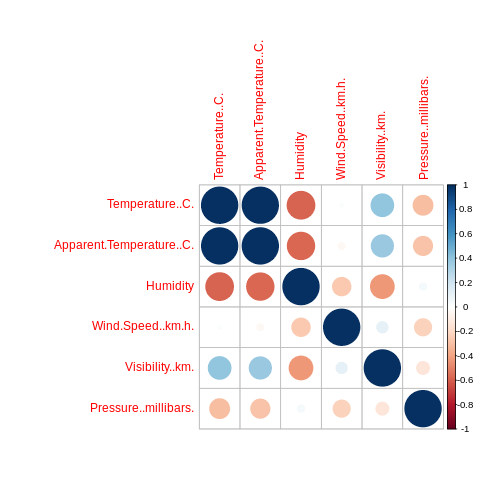

In [0]:
%%R
df.cor = cor(df.drop, method = "spearman", use = "complete.obs")
corrplot(df.cor)

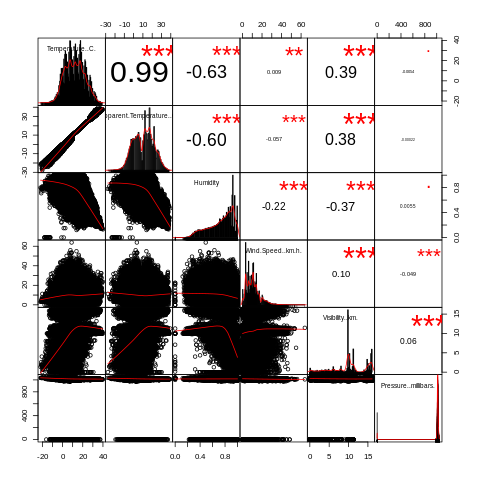

In [0]:
%%R
chart.Correlation(df.drop, histogram=TRUE, pch=19)

## Modele

W celu doboru odpowiedniego modelu część zmiennych należy usunąć. Są to kolumny z informacją o czasie pomiaru, kierunku wiatru oraz zachmurzeniu. Poniżej przedstawione są wybrane kolumny danych.

In [0]:
%%R
#usunięcie zbędnych kolumn
data <- subset(df,select=-c(Formatted.Date,Wind.Bearing..degrees.,Loud.Cover))
dane <- na.omit(data)
#zamiana zmiennej ciągłej na zmienną kategoryczną
lvl <-c(0,0.25,0.5,0.75,10)
dane$Humidity.cat <- cut(dane$Humidity,lvl,include.lowest=T, labels=c("very low", "low", "middle", "high"))
#dane <- subset(dane, select=-c(Humidity))
dane$Precip.Type <- as.numeric(dane$Precip.Type)


In [0]:
%%R
head(dane)

        Summary Precip.Type Temperature..C. Apparent.Temperature..C. Humidity
1 Partly Cloudy           2        9.472222                 7.388889     0.89
2 Partly Cloudy           2        9.355556                 7.227778     0.86
3 Mostly Cloudy           2        9.377778                 9.377778     0.89
4 Partly Cloudy           2        8.288889                 5.944444     0.83
5 Mostly Cloudy           2        8.755556                 6.977778     0.83
6 Partly Cloudy           2        9.222222                 7.111111     0.85
  Wind.Speed..km.h. Visibility..km. Pressure..millibars.
1           14.1197         15.8263              1015.13
2           14.2646         15.8263              1015.63
3            3.9284         14.9569              1015.94
4           14.1036         15.8263              1016.41
5           11.0446         15.8263              1016.51
6           13.9587         14.9569              1016.66
                      Daily.Summary Humidity.cat
1 Part

### Model 1. - zmienne ciągłe

Najpierw postaramy się znaleźć możliwie najlepszy model zawierający jedynie zmienne ciągłe. Dzięki poleceniu 'step' znajdujemy model o możliwie najniższym AIC.

In [0]:
%%R #sprawdzenie modeli tylko ze zmiennymi ciągłymi

model.null <- lm(Apparent.Temperature..C.~1,data=dane[1:3000,])
model.full <- lm(Apparent.Temperature..C.~Temperature..C.+Wind.Speed..km.h.+Precip.Type+Visibility..km.+Pressure..millibars.,data=dane[1:3000,])
model1 <- step(model.full,formula(model.null))
AIC(model1)

Start:  AIC=256.92
Apparent.Temperature..C. ~ Temperature..C. + Wind.Speed..km.h. + 
    Precip.Type + Visibility..km. + Pressure..millibars.

                       Df Sum of Sq    RSS     AIC
- Precip.Type           1         2   3257   256.3
<none>                                3255   256.9
- Pressure..millibars.  1         4   3259   258.6
- Visibility..km.       1         5   3260   259.1
- Wind.Speed..km.h.     1      2103   5358  1749.9
- Temperature..C.       1    159467 162723 11990.3

Step:  AIC=256.32
Apparent.Temperature..C. ~ Temperature..C. + Wind.Speed..km.h. + 
    Visibility..km. + Pressure..millibars.

                       Df Sum of Sq    RSS     AIC
<none>                                3257   256.3
- Pressure..millibars.  1         4   3261   258.2
- Visibility..km.       1         5   3262   259.1
- Wind.Speed..km.h.     1      2149   5406  1774.5
- Temperature..C.       1    233355 236612 13111.4
[1] 8771.948


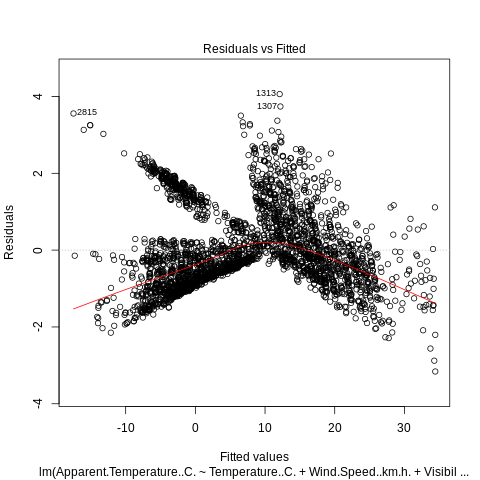

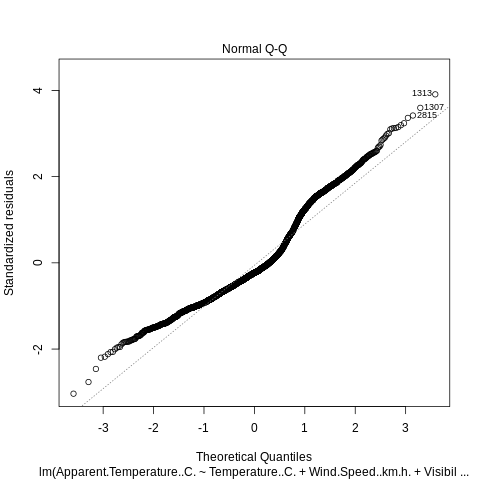

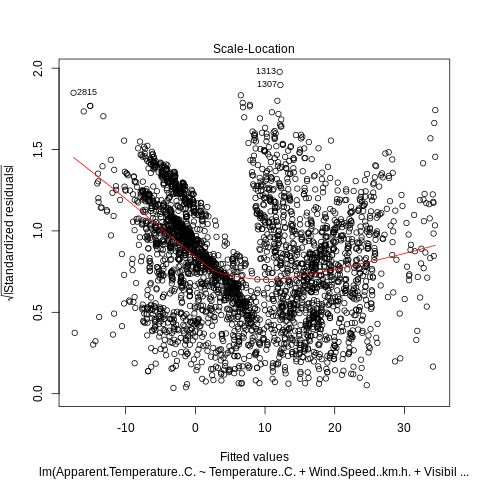

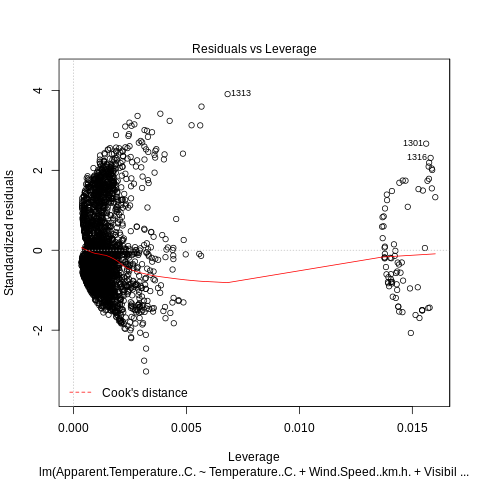

In [0]:
%%R
plot(model1)

In [0]:
#usunięcie obserwacji odstających/wpływowych
%%R

dane2<-dane[-c(1307,1313,2815,1301,1316),]
model.null_better <- lm(Apparent.Temperature..C.~1,data=dane2[1:2995,])
model.full_better <- lm(Apparent.Temperature..C.~Temperature..C.+Wind.Speed..km.h.+Precip.Type+Visibility..km.+Pressure..millibars.,data=dane2[1:2995,])
model1_better <- step(model.full_better,formula(model.null_better))
AIC(model1_better)

Start:  AIC=208.37
Apparent.Temperature..C. ~ Temperature..C. + Wind.Speed..km.h. + 
    Precip.Type + Visibility..km. + Pressure..millibars.

                       Df Sum of Sq    RSS     AIC
- Precip.Type           1         1   3199   207.6
- Pressure..millibars.  1         2   3200   208.2
<none>                                3198   208.4
- Visibility..km.       1         5   3203   210.7
- Wind.Speed..km.h.     1      2139   5337  1740.2
- Temperature..C.       1    159136 162334 11968.2

Step:  AIC=207.58
Apparent.Temperature..C. ~ Temperature..C. + Wind.Speed..km.h. + 
    Visibility..km. + Pressure..millibars.

                       Df Sum of Sq    RSS     AIC
<none>                                3199   207.6
- Pressure..millibars.  1         2   3201   207.6
- Visibility..km.       1         5   3205   210.5
- Wind.Speed..km.h.     1      2185   5384  1764.7
- Temperature..C.       1    232667 235866 13085.1
[1] 8709.025


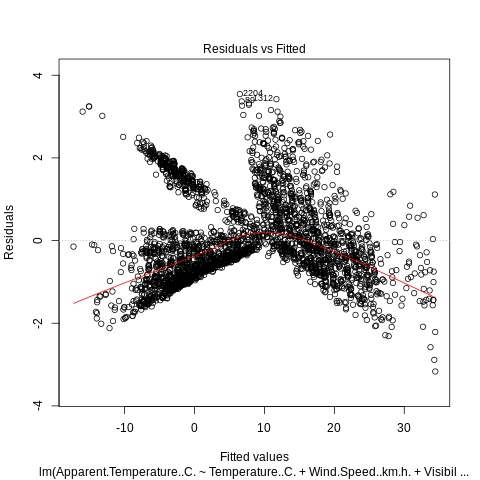

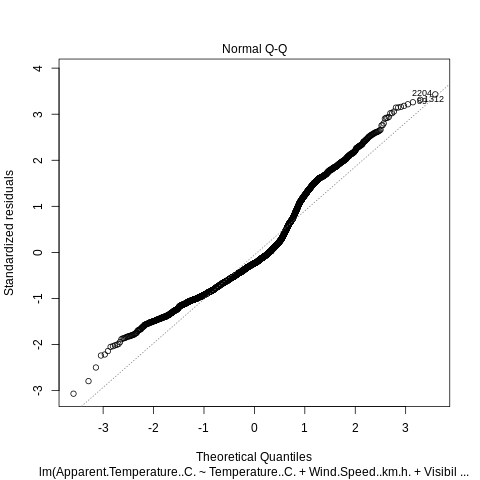

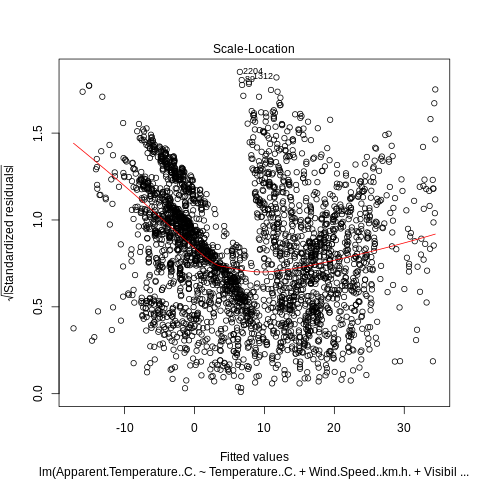

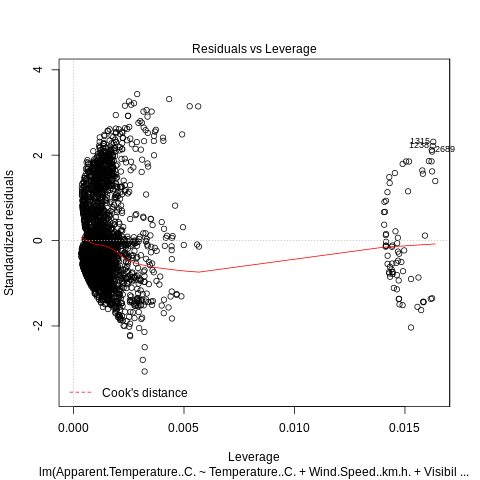

In [0]:
%%R
plot(model1_better)

In [0]:
%%R
anova(model1_better,model.full_better)


Analysis of Variance Table

Model 1: Apparent.Temperature..C. ~ Temperature..C. + Wind.Speed..km.h. + 
    Visibility..km. + Pressure..millibars.
Model 2: Apparent.Temperature..C. ~ Temperature..C. + Wind.Speed..km.h. + 
    Precip.Type + Visibility..km. + Pressure..millibars.
  Res.Df    RSS Df Sum of Sq      F Pr(>F)
1   2990 3199.2                           
2   2989 3197.9  1    1.2994 1.2145 0.2705


### Model 2. -zmienne kategoryczne

Podobnie jak dla wcześniejszego modelu korzystamy z funkcji 'step'. Tym razem nie ograniczamy się tylko do zmiennych ciągłych.


In [0]:
%%R #modele ze zmiennymi kategorycznymi
#model.null2 <- lm(Apparent.Temperature..C.~1,data=dane[1:3000,])
model.full2 <- lm(Apparent.Temperature..C.~.,data=dane[1:3000,])
model2 <-step(model.full2,formula(model.null))
AIC(model2)

Start:  AIC=-220.23
Apparent.Temperature..C. ~ Summary + Precip.Type + Temperature..C. + 
    Humidity + Wind.Speed..km.h. + Visibility..km. + Pressure..millibars. + 
    Daily.Summary + Humidity.cat

                       Df Sum of Sq   RSS    AIC
- Humidity              1         0  2680 -221.8
- Visibility..km.       1         1  2681 -221.3
<none>                               2680 -220.2
- Pressure..millibars.  1         3  2683 -218.7
- Summary               8        24  2704 -209.3
- Precip.Type           1        18  2698 -202.1
- Humidity.cat          2        20  2700 -201.7
- Daily.Summary        42       481  3162  191.4
- Wind.Speed..km.h.     1      1589  4270 1174.7
- Temperature..C.       1     64705 67385 9451.4

Step:  AIC=-221.85
Apparent.Temperature..C. ~ Summary + Precip.Type + Temperature..C. + 
    Wind.Speed..km.h. + Visibility..km. + Pressure..millibars. + 
    Daily.Summary + Humidity.cat

                       Df Sum of Sq   RSS    AIC
- Visibility..km.    

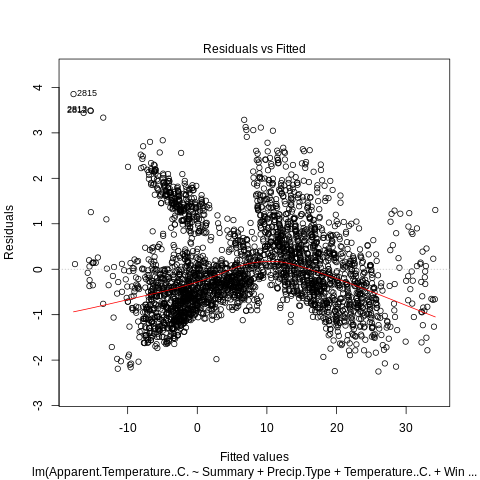

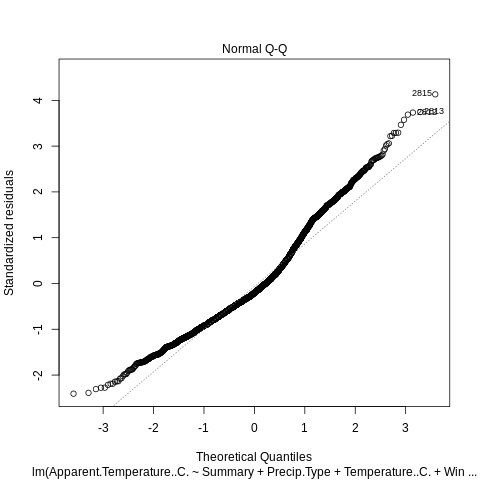

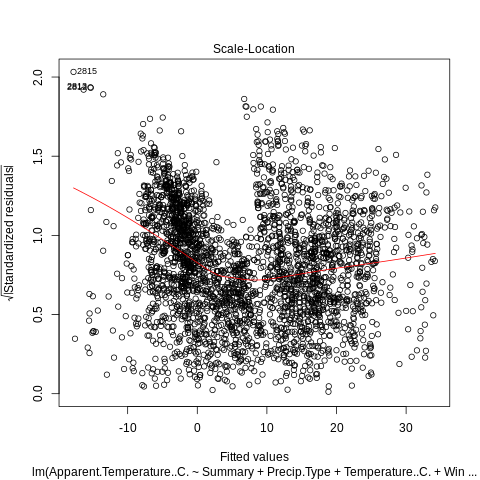

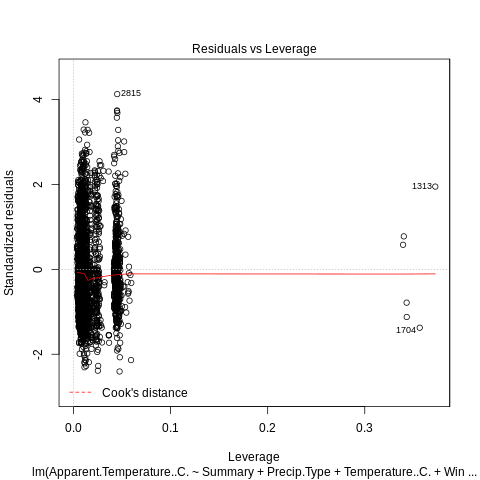

In [0]:
%%R
plot(model2)

In [0]:
%%R
# usuwamy  obserwacje
dane3<-dane[-c(2815,1313,1704,2816,2813,2812,2817),]
model.null2_better <- lm(Apparent.Temperature..C.~1,data=dane3[1:2995,])
model.full2_better <- lm(Apparent.Temperature..C.~.,data=dane3[1:2995,])
model2_better <-step(model.full2_better,formula(model.null_better))
AIC(model2_better)

Start:  AIC=-310.26
Apparent.Temperature..C. ~ Summary + Precip.Type + Temperature..C. + 
    Humidity + Wind.Speed..km.h. + Visibility..km. + Pressure..millibars. + 
    Daily.Summary + Humidity.cat

                       Df Sum of Sq   RSS    AIC
- Humidity              1         0  2596 -312.0
- Visibility..km.       1         1  2597 -311.5
<none>                               2596 -310.3
- Pressure..millibars.  1         4  2600 -308.2
- Summary               8        26  2622 -296.8
- Humidity.cat          2        20  2616 -291.2
- Precip.Type           1        20  2616 -289.1
- Daily.Summary        42       489  3085  122.6
- Wind.Speed..km.h.     1      1541  4137 1083.7
- Temperature..C.       1     64804 67399 9441.5

Step:  AIC=-312.02
Apparent.Temperature..C. ~ Summary + Precip.Type + Temperature..C. + 
    Wind.Speed..km.h. + Visibility..km. + Pressure..millibars. + 
    Daily.Summary + Humidity.cat

                       Df Sum of Sq   RSS    AIC
- Visibility..km.    

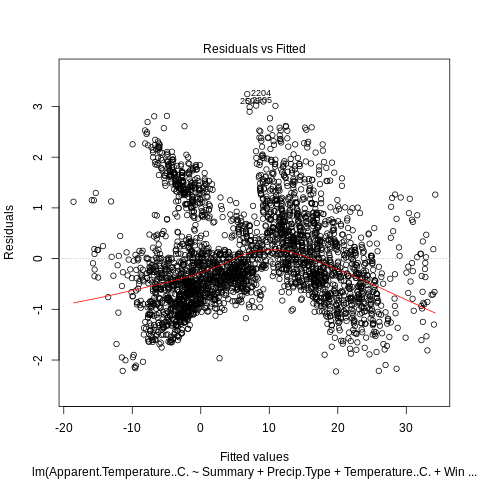

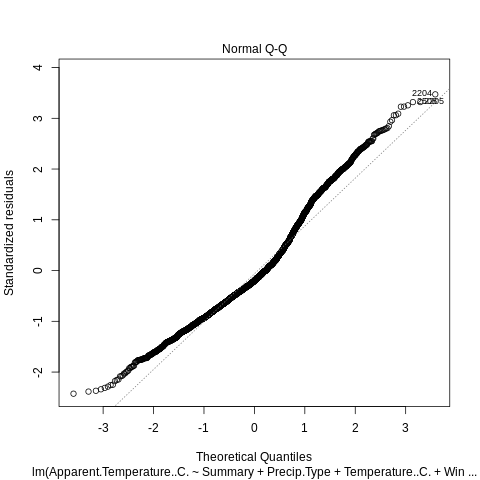

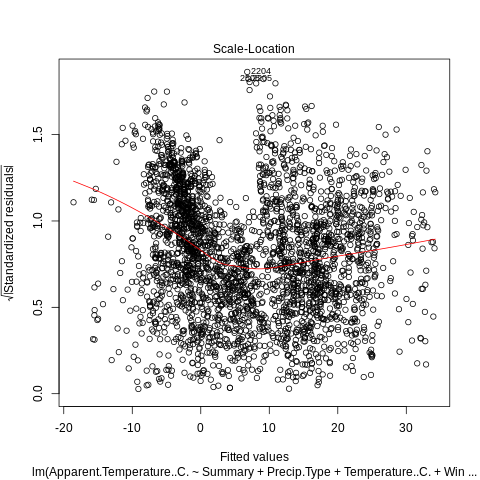

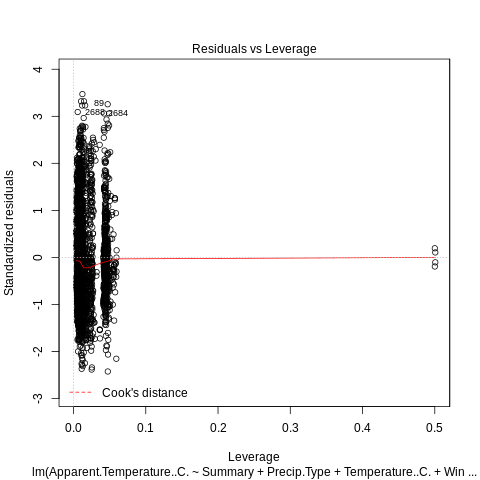

In [0]:
%%R
plot(model2_better)

Postanowiłyśmy sprawdzić też modele, które intuicyjnie powinny mieć sens. Niestety wyniki okazały się dalekie od oczekiwań.

In [0]:
%%R
model_test1 <- lm(Apparent.Temperature..C.~Temperature..C. + Humidity.cat + Visibility..km.,data=dane[1:3000,])
model_test2 <- lm(Apparent.Temperature..C.~Humidity.cat + Visibility..km.,data=dane[1:3000,])
model_test3 <- lm(Apparent.Temperature..C.~Humidity.cat + Visibility..km.+Pressure..millibars.,data=dane[1:3000,])
print(c(AIC(model_test1),AIC(model_test2),AIC(model_test3)))

[1] 10209.03 21065.37 21048.53


In [0]:
%%R
anova(model2_better,model.full2_better)



Analysis of Variance Table

Model 1: Apparent.Temperature..C. ~ Summary + Precip.Type + Temperature..C. + 
    Wind.Speed..km.h. + Pressure..millibars. + Daily.Summary + 
    Humidity.cat
Model 2: Apparent.Temperature..C. ~ Summary + Precip.Type + Temperature..C. + 
    Humidity + Wind.Speed..km.h. + Visibility..km. + Pressure..millibars. + 
    Daily.Summary + Humidity.cat
  Res.Df    RSS Df Sum of Sq     F Pr(>F)
1   2938 2596.8                          
2   2936 2595.9  2   0.82408 0.466 0.6275


### Model 3. -zmienne kategoryczne i ciągłe

Ostatni z zaproponowanych modeli bazuje na teoretycznie najlepszym modelu z poprzedniego podpunktu. Wprowadzamy interakcje. Tutaj można się sugerować utworzoną wcześniej mapą korelacji. 

In [0]:
%%R #interakcje
#model - interakcje
model_inter1 <- lm(Apparent.Temperature..C. ~ Summary + Precip.Type * Temperature..C. + Wind.Speed..km.h. + Pressure..millibars. + Daily.Summary + Humidity.cat,data=dane[1:3000,])
model_inter2 <- lm(Apparent.Temperature..C. ~ Summary + Precip.Type + Temperature..C. * Wind.Speed..km.h. * Humidity.cat+ Pressure..millibars. + Daily.Summary ,data=dane[1:3000,])
model_inter3 <- lm(Apparent.Temperature..C. ~ Summary + Precip.Type + Temperature..C. + Wind.Speed..km.h. * Pressure..millibars. + Daily.Summary + Humidity.cat,data=dane[1:3000,])
model_inter4 <- lm(Apparent.Temperature..C. ~ Summary + Precip.Type * Temperature..C. + Wind.Speed..km.h. * Pressure..millibars. + Daily.Summary + Humidity.cat,data=dane[1:3000,])
print(c(AIC(model_inter1),AIC(model_inter2),AIC(model_inter3),AIC(model_inter4)))
#summary(model_inter4)

[1] 8278.155 5272.833 8280.238 8266.083


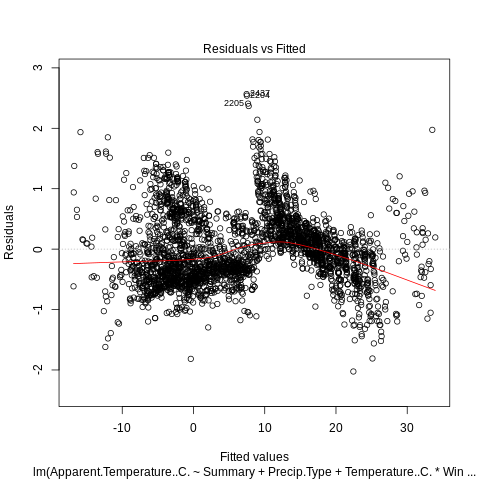

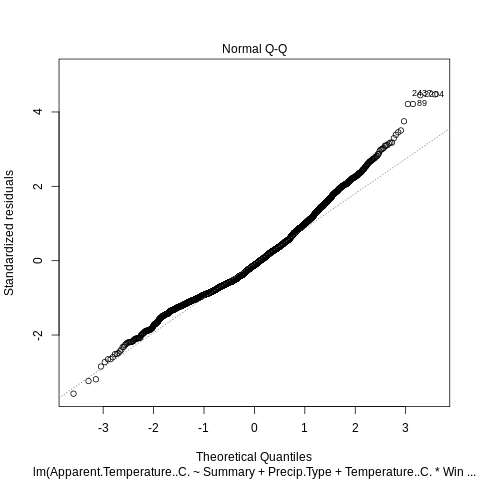

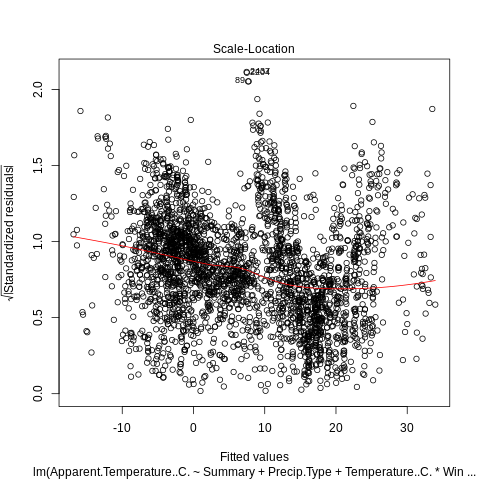

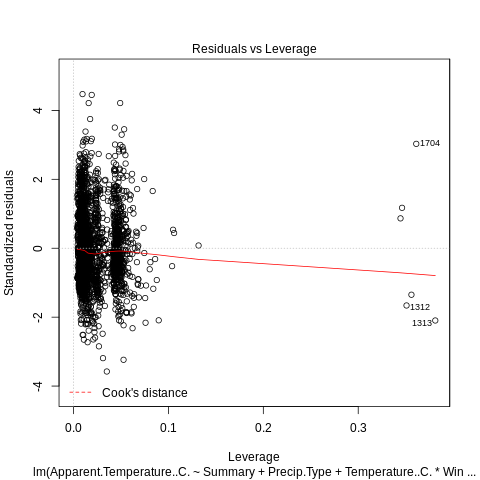

In [0]:
%%R
plot(model_inter2)

In [0]:
%%R
dane4<-dane[-c(2205,89,1704,1313,1312),]
model_inter2_better <- lm(Apparent.Temperature..C. ~ Summary + Precip.Type + Temperature..C. * Wind.Speed..km.h. * Humidity.cat+ Pressure..millibars. + Daily.Summary ,data=dane4[1:2995,])
AIC(model_inter2_better)

[1] 5217.81


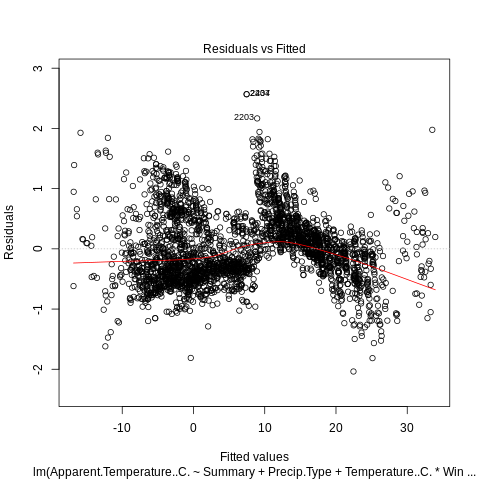

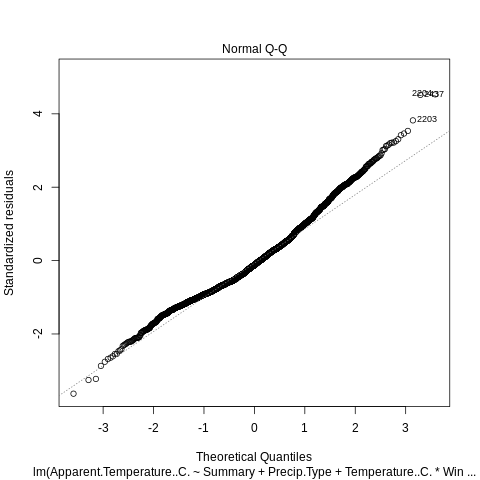

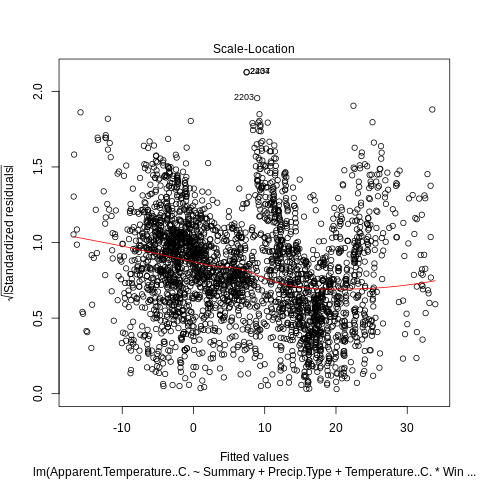

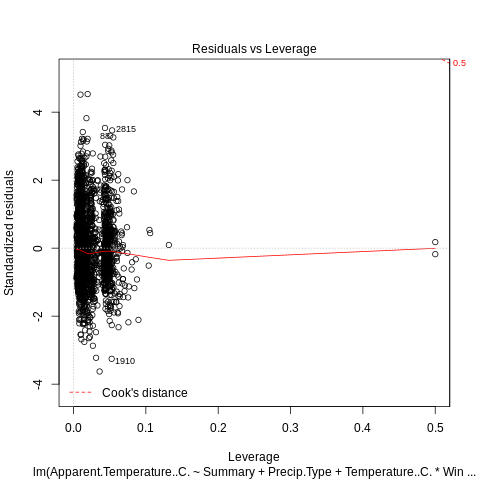

In [0]:
%%R
plot(model_inter2_better)

In [0]:
%%R
#anova(model1_better,model2_better)

Analysis of Variance Table

Model 1: Apparent.Temperature..C. ~ Temperature..C. + Wind.Speed..km.h. + 
    Visibility..km. + Pressure..millibars.
Model 2: Apparent.Temperature..C. ~ Summary + Precip.Type + Temperature..C. + 
    Wind.Speed..km.h. + Pressure..millibars. + Daily.Summary + 
    Humidity.cat
  Res.Df    RSS Df Sum of Sq      F    Pr(>F)    
1   2990 3199.2                                  
2   2938 2596.8 52    602.47 13.108 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [0]:
%%R
#anova(model1_better,model_inter2_better)

Analysis of Variance Table

Model 1: Apparent.Temperature..C. ~ Temperature..C. + Wind.Speed..km.h. + 
    Visibility..km. + Pressure..millibars.
Model 2: Apparent.Temperature..C. ~ Summary + Precip.Type + Temperature..C. * 
    Wind.Speed..km.h. * Humidity.cat + Pressure..millibars. + 
    Daily.Summary
  Res.Df    RSS Df Sum of Sq     F    Pr(>F)    
1   2990 3199.2                                 
2   2931  958.7 59    2240.5 116.1 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [0]:
%%R 
summary(model1_better)


Call:
lm(formula = Apparent.Temperature..C. ~ Temperature..C. + Wind.Speed..km.h. + 
    Visibility..km. + Pressure..millibars., data = dane2[1:2995, 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1672 -0.7258 -0.2446  0.6102  3.5435 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.8073237  0.1340745  -6.021 1.94e-09 ***
Temperature..C.       1.1391329  0.0024428 466.314  < 2e-16 ***
Wind.Speed..km.h.    -0.1446325  0.0032006 -45.190  < 2e-16 ***
Visibility..km.      -0.0111668  0.0050284  -2.221   0.0264 *  
Pressure..millibars. -0.0001752  0.0001226  -1.429   0.1530    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.034 on 2990 degrees of freedom
Multiple R-squared:  0.9901,	Adjusted R-squared:  0.9901 
F-statistic: 7.473e+04 on 4 and 2990 DF,  p-value: < 2.2e-16



In [0]:
%%R
summary(model2_better)


Call:
lm(formula = Apparent.Temperature..C. ~ Summary + Precip.Type + 
    Temperature..C. + Wind.Speed..km.h. + Pressure..millibars. + 
    Daily.Summary + Humidity.cat, data = dane3[1:2995, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2260 -0.6509 -0.1847  0.5286  3.2436 

Coefficients:
                                                                                 Estimate
(Intercept)                                                                    -1.1016635
SummaryBreezy and Overcast                                                      1.7240126
SummaryBreezy and Partly Cloudy                                                 2.7749871
SummaryClear                                                                    0.1904693
SummaryFoggy                                                                    0.4261490
SummaryHumid and Mostly Cloudy                                                 -0.3924106
SummaryMostly Cloudy                                             

In [0]:
%%R
summary(model_inter2_better)


Call:
lm(formula = Apparent.Temperature..C. ~ Summary + Precip.Type + 
    Temperature..C. * Wind.Speed..km.h. * Humidity.cat + Pressure..millibars. + 
    Daily.Summary, data = dane4[1:2995, ])

Residuals:
     Min       1Q   Median       3Q      Max 
-2.03695 -0.39488 -0.06911  0.31353  2.56976 

Coefficients:
                                                                                 Estimate
(Intercept)                                                                     4.011e+00
SummaryBreezy and Overcast                                                     -9.472e-01
SummaryBreezy and Partly Cloudy                                                -2.203e+00
SummaryClear                                                                   -8.839e-01
SummaryFoggy                                                                   -9.194e-01
SummaryHumid and Mostly Cloudy                                                 -1.584e+00
SummaryMostly Cloudy                                   

## Wnioski

Przeprowadziliśmy test dla modelu regresji liniowej. Otrzymane p-value świadczy o tym, że odrzucamy hipotezę zerową na rzecz hipotezy alternatywnej - co najmniej jedna zmienna w modelu jest istotna. Współczynnik determinancji jest bliski 1 w każdym przypadku. W przypadku anovy nie ma podstaw do odrzucenia hipotezy zerowej - zaproponowane 'mniejsze' modele są poprawne. Na podstawie kryterium AIC wybieramy model z interakcjami - jest on najmniej przetrenowany.
